In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head(50)
df_train

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,4286,1,1,1,6,1,1,1,22,14,...,0,5,9,4,13.666667,1,10.8,1.4,1.74,Graduate
2472,4399,1,1,1,11,1,1,1,22,14,...,0,6,6,6,14.333333,0,9.4,-0.8,-3.12,Graduate
2473,3526,2,12,1,4,1,1,1,1,3,...,2,7,7,5,11.200000,0,8.9,1.4,3.51,Dropout
2474,1050,1,1,1,2,1,1,1,1,28,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df_train['Category']= df_train['Category'].replace({'Graduate': 2, 'Dropout': 1, 'Enrolled': 0})

df_train["Category"].head(10)



0    2
1    1
2    2
3    2
4    1
5    0
6    2
7    0
8    2
9    2
Name: Category, dtype: int64

In [5]:
matrix = df_train.corr().round(2)
matrix

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
Id,1.00,0.06,0.03,-0.01,-0.02,-0.04,-0.02,0.00,0.06,0.07,...,0.05,0.03,0.03,0.01,-0.01,0.00,-0.03,0.02,-0.01,-0.03
Marital status,0.06,1.00,0.23,-0.13,0.02,-0.29,0.13,-0.02,0.18,0.12,...,0.08,0.05,0.03,-0.02,-0.05,0.01,-0.03,0.00,-0.01,-0.03
Application mode,0.03,0.23,1.00,-0.23,-0.07,-0.27,0.42,0.00,0.09,0.08,...,0.24,0.13,0.16,-0.05,-0.09,0.04,0.07,-0.02,-0.01,-0.15
Application order,-0.01,-0.13,-0.23,1.00,0.12,0.16,-0.19,-0.04,-0.09,-0.08,...,-0.13,0.02,-0.05,0.06,0.05,-0.02,-0.10,-0.03,0.03,0.09
Course,-0.02,0.02,-0.07,0.12,1.00,-0.04,-0.14,-0.00,0.03,0.03,...,-0.13,0.19,0.04,0.12,0.18,-0.03,-0.04,0.05,-0.02,0.03
Daytime/evening attendance,-0.04,-0.29,-0.27,0.16,-0.04,1.00,-0.12,0.03,-0.20,-0.15,...,-0.10,0.00,0.03,0.04,0.05,-0.02,0.07,-0.03,0.02,0.01
Previous qualification,-0.02,0.13,0.42,-0.19,-0.14,-0.12,1.00,-0.03,0.01,0.01,...,0.14,0.07,0.10,-0.03,-0.04,0.03,0.07,-0.07,0.08,-0.05
Nacionality,0.00,-0.02,0.00,-0.04,-0.00,0.03,-0.03,1.00,-0.04,-0.10,...,0.00,-0.01,0.00,-0.02,-0.00,0.01,-0.01,-0.00,0.05,-0.01
Mother's qualification,0.06,0.18,0.09,-0.09,0.03,-0.20,0.01,-0.04,1.00,0.53,...,0.04,0.01,0.00,-0.04,-0.05,0.04,-0.10,0.03,-0.10,0.02
Father's qualification,0.07,0.12,0.08,-0.08,0.03,-0.15,0.01,-0.10,0.53,1.00,...,0.04,0.00,-0.00,-0.01,-0.02,0.02,-0.08,0.05,-0.09,0.03


<AxesSubplot: >

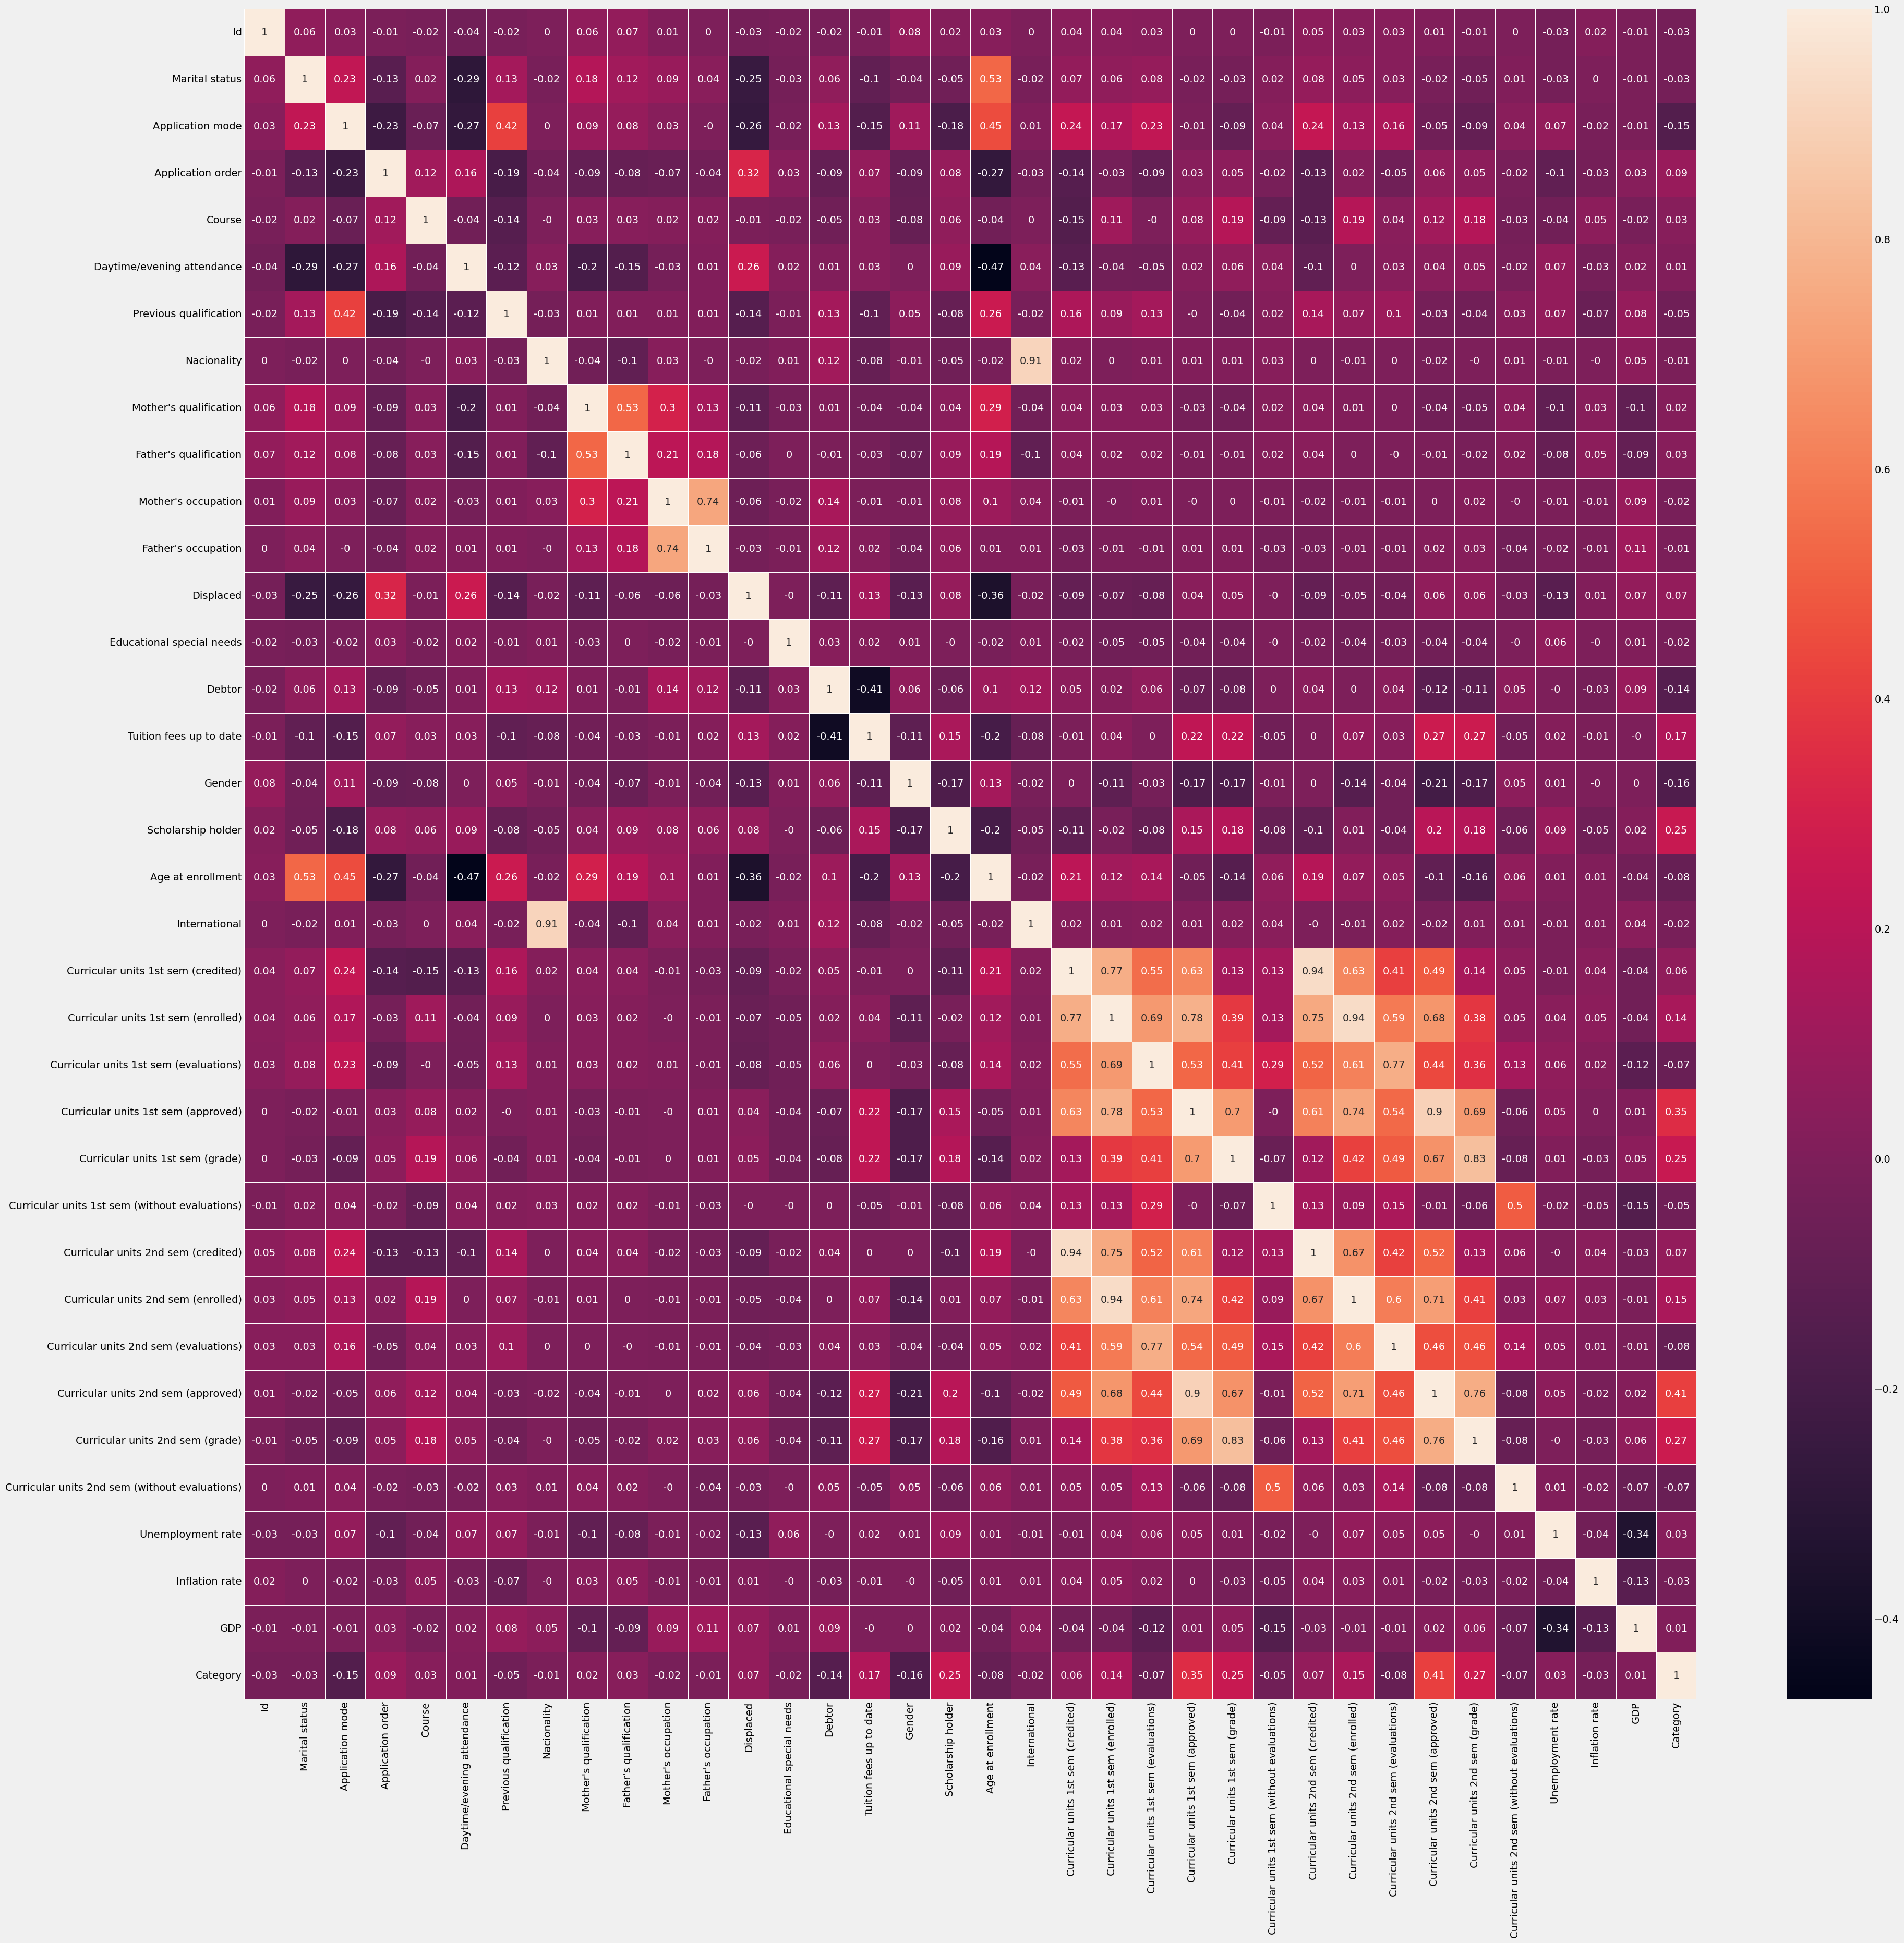

In [6]:
fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(matrix, annot=True, linewidths=.5, ax=ax)

In [7]:
mask = np.triu(np.ones_like(matrix, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [8]:
matrix = matrix.unstack()
matrix

Id        Id                                                1.00
          Marital status                                    0.06
          Application mode                                  0.03
          Application order                                -0.01
          Course                                           -0.02
                                                            ... 
Category  Curricular units 2nd sem (without evaluations)   -0.07
          Unemployment rate                                 0.03
          Inflation rate                                   -0.03
          GDP                                               0.01
          Category                                          1.00
Length: 1296, dtype: float64

In [9]:
matrix[np.abs(matrix) >= 0.7]
matrix.to_csv('matrix')


In [10]:
X = df_train[['Course', 'Previous qualification', "Mother's qualification"]]
X

,Course,Previous qualification,Mother's qualification
0,14,1,13
1,9,1,23
2,17,1,1
3,12,12,1
4,14,1,19
...,...,...,...
2471,6,1,22
2472,11,1,22
2473,4,1,1
2474,2,1,1


In [11]:
y = df_train[["Category"]]
y

,Category
0,2
1,1
2,2
3,2
4,1
...,...
2471,2
2472,2
2473,1
2474,2


In [12]:
model = xgboost.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [13]:
df_validation = pd.read_csv("validation.csv")
df_validation.head(10)

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,1255,4,12,1,8,1,1,1,3,1,...,0,6,16,1,10.000000,0,11.1,0.6,2.02,Dropout
1,3458,1,8,1,10,1,1,1,4,3,...,0,6,8,6,12.142857,0,16.2,0.3,-0.92,Graduate
2,3390,1,8,1,16,1,1,1,23,28,...,0,7,7,7,12.285714,0,16.2,0.3,-0.92,Graduate
3,1497,1,8,2,14,1,1,1,1,1,...,0,6,8,5,13.000000,0,15.5,2.8,-4.06,Graduate
4,1536,1,12,1,12,1,1,1,22,14,...,0,7,14,0,0.000000,0,11.1,0.6,2.02,Dropout
5,287,1,12,1,3,0,11,1,19,1,...,0,6,12,4,11.500000,0,7.6,2.6,0.32,Graduate
6,3416,1,1,1,15,1,1,1,3,3,...,0,6,6,6,12.500000,0,16.2,0.3,-0.92,Enrolled
7,1366,1,16,1,7,1,1,1,1,14,...,2,7,9,6,13.875000,0,11.1,0.6,2.02,Dropout
8,3926,1,8,5,12,1,1,1,13,1,...,0,8,8,8,14.341250,0,9.4,-0.8,-3.12,Graduate
9,1055,1,1,1,12,1,1,1,13,14,...,0,8,9,7,14.671429,0,12.4,0.5,1.79,Graduate


In [14]:
df_validation['Category']= df_validation['Category'].replace({'Graduate': 2, 'Dropout': 1, 'Enrolled': 0})

df_validation["Category"]

0       1
1       2
2       2
3       2
4       1
       ..
1323    2
1324    2
1325    2
1326    0
1327    2
Name: Category, Length: 1328, dtype: int64

In [15]:
X_test = df_validation[['Course', 'Previous qualification', "Mother's qualification"]]
y_test = df_validation[["Category"]]

In [16]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [17]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.22%


In [18]:
df_test= pd.read_csv("test.csv")
df_test

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,3557,1,12,1,4,1,1,1,1,1,...,0,0,6,0,0,0.000000,0,13.9,-0.3,0.79
1,1980,1,1,1,9,1,1,1,13,14,...,0,0,5,5,5,13.000000,0,12.4,0.5,1.79
2,1112,1,1,2,12,1,1,1,23,14,...,0,0,7,8,6,12.500000,0,11.1,0.6,2.02
3,2914,6,12,2,9,1,1,1,22,27,...,0,0,5,0,0,0.000000,0,9.4,-0.8,-3.12
4,2745,1,1,2,16,1,1,1,22,14,...,0,0,6,8,6,13.142857,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,335,1,15,1,10,1,14,1,23,27,...,0,2,6,6,6,14.666667,0,13.9,-0.3,0.79
616,1639,1,1,1,5,1,1,1,3,1,...,0,5,12,12,11,14.818182,0,16.2,0.3,-0.92
617,1381,1,12,1,12,1,1,1,23,14,...,0,0,8,0,0,0.000000,0,16.2,0.3,-0.92
618,2455,1,15,1,4,1,14,1,13,14,...,0,0,6,10,6,15.300000,0,16.2,0.3,-0.92


In [19]:
X_new = df_test[['Course', 'Previous qualification', "Mother's qualification"]]


In [20]:
y_new = model.predict(X_new)
predictions_new= [round(value) for value in y_new]
print(y_new)

[1 1 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 0 2 2 2 2 2 2 2 1 1 2 1 2
 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 0 1 2 2 2 1 1 2 2 2 1 2 2
 2 1 1 2 2 2 2 1 2 1 2 0 2 2 0 2 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 1 1 2 2
 1 2 1 1 2 2 1 2 1 1 1 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 1 1 2 2 2 0
 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 2 1 2 1 1 1 1 2 1 2 2 2 1 2 1 2 1 1 2 2 1 1
 2 2 0 2 2 2 2 2 2 2 2 1 2 0 1 1 0 1 1 2 2 1 1 0 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 2 1 2 2 0 1 1 2 2 2 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 1 1 2 2 2 2
 1 2 1 2 2 1 2 2 2 1 1 1 1 2 2 1 1 2 1 2 2 2 1 1 1 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 1 2 2 1 2 1 2 1 1 1 1 2 2 2 1 2 2 1 2 2 1
 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 0 2 2 2 2 2 1 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1
 2 2 1 2 2 2 1 1 1 1 2 1 0 2 2 2 1 1 0 2 2 1 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 1 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 1 1 2 1 1 2 2 1
 2 1 2 2 1 2 2 2 2 2 1 2 

In [21]:
y_new = model.predict(X_new)
predictions_new = [round(value) for value in y_new]
print(predictions_new)
df_test["Category"] = predictions_new


[1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 

In [22]:
df_sample= pd.read_csv("sample_submission.csv")
df_sample

,Id,Category
0,3557,Graduate
1,1980,Graduate
2,1112,Graduate
3,2914,Graduate
4,2745,Graduate
...,...,...
615,335,Graduate
616,1639,Graduate
617,1381,Graduate
618,2455,Graduate


In [23]:
df_test[['Id','Category']]

,Id,Category
0,3557,1
1,1980,1
2,1112,2
3,2914,1
4,2745,1
...,...,...
615,335,2
616,1639,2
617,1381,2
618,2455,2


In [24]:
df_test['Category']= df_test['Category'].replace({2:'Graduate', 1:'Dropout', 0:'Enrolled'})
df = df_test[['Id','Category']]
df

,Id,Category
0,3557,Dropout
1,1980,Dropout
2,1112,Graduate
3,2914,Dropout
4,2745,Dropout
...,...,...
615,335,Graduate
616,1639,Graduate
617,1381,Graduate
618,2455,Graduate


In [25]:
df.to_csv('submission.csv',index=False)